Importing Project dependencies

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/goodreadsbooks/books.csv


We will start by importing our data set. It's a data set that contains information about books, who wrote these books and other relevant information. Let's take a look aat what our different columns mean - 
* bookID - Contains the unique ID for each book/series
* title - contains the titles of the books
* authors - contains the author of the particular book
* average_rating - the average rating of the books, as decided by the users
* ISBN - Another unique number to identify the book, the International Standard Book Number.
* ISBN 13 - A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
* language_code - Helps understand what is the primary language of the book. For instance, eng is standard for                     English.
* Num_pages - Number of pages the book contains.
* Ratings_count - Total number of ratings the book received.
* text_reviews_count - Total number of written text reviews the book received.

In [ ]:
df = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv',error_bad_lines = False)

In [ ]:
df.head() #checking the head of our data

Now that we know how what our data looks like, lets go ahead and look for any null values present in our data.

In [ ]:
df.isnull().sum() #checking for any null values present in the data

In [ ]:
df.dtypes #checking the data types of each column

In [ ]:
df.describe() #checking for hidden values such as the maximum rating of our books, the average number of ratings

From the above results, we can see that our our ratings all lie between 0 and 5. We get know more about the other columns as well, such as the mean of average ratings and some other information that might help us in the future steps. We also checked the data types of each column and also saw that there are no null values present in our data.

In [ ]:
top_ten = df[df['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False).head(10)

The above results show us the top 10 books present in our data. We saw that the maximum rating in our data was 5.0 but we dont see any books in the above result with 5.0 rating. This is because we filtered these books on the basis of the number of ratings. We made sure that all the books that we have in the above results have a decent amount of rating. There can be books in the data that can have only 1 or 2 ratings can be rated 5.0. We want to avoid such books hence this sort of filtering. Let's go ahead and visualize this outcome in form of a graph.

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

Let's go ahead and take a look at some top authors present in our data. We will rank them according to the number of books they have written provided these books are present in the data.

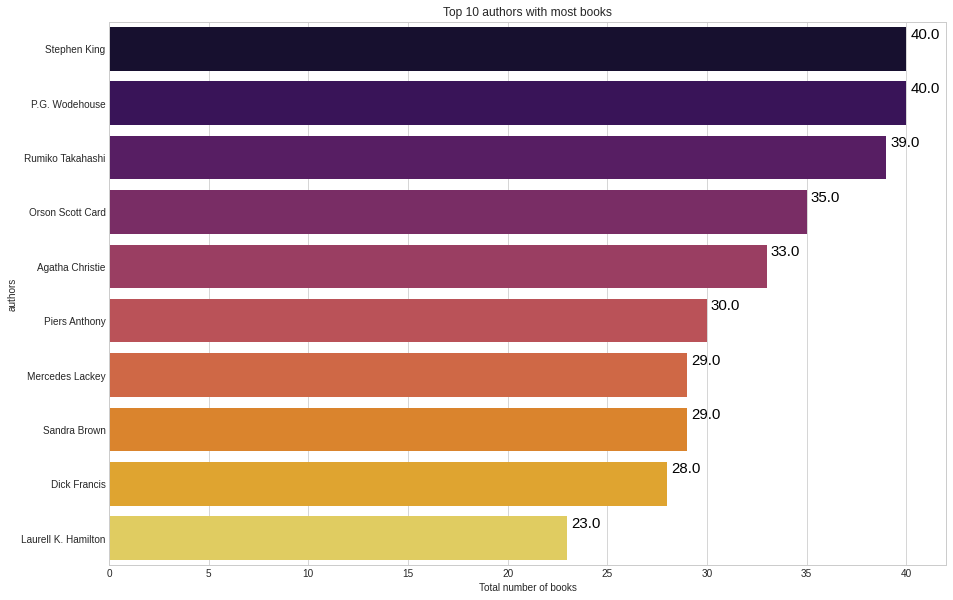

In [9]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

According to our graphs, Stephen king and P.G. Wodehouse have the most number of books in the data. Both the authors have 40 books in our data set followed by Rumiko Takahashi and Orson scott Card.

In [10]:
#df.head()

Next we will take a look at the books that have been reviewed the most. We have the average ratings column in our data and also the number of times a particular book has been rated. We will try to use this column to find out most reviewed Books present in our data.

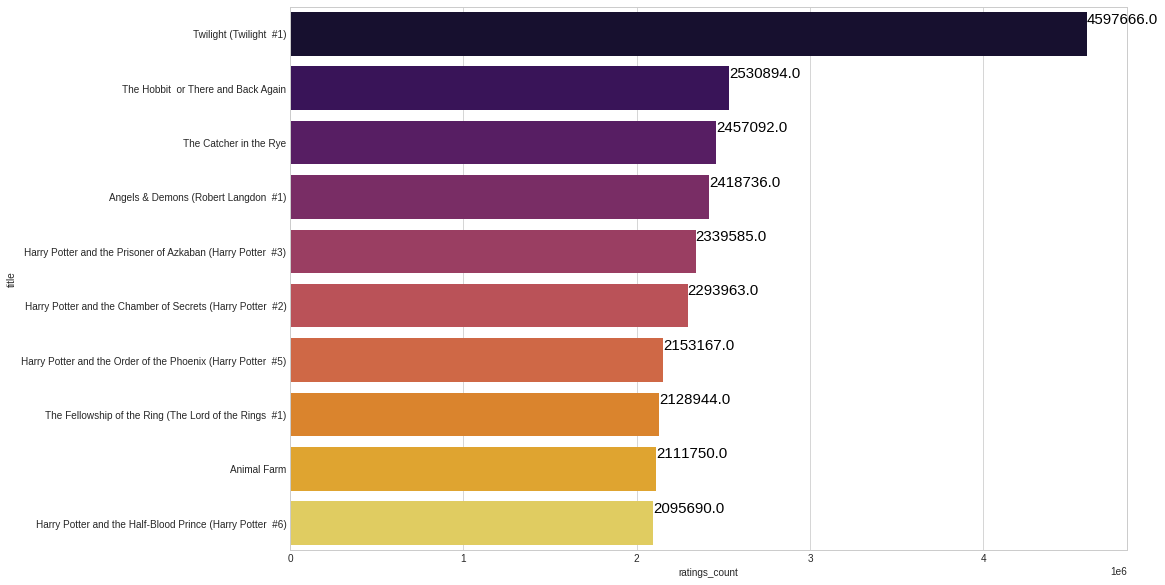

In [11]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

We can see that Twilight has been rated more number of times as compared to any other book! Also, these ratings are all in Millions! So that means twilight was rated more than 4 Million times followed by The Hobbit or There and Back Again and The Catcher in the Rye which have been reviewed more than 2 Million times!

Now we know that these books can be written in many different languages. We will use the language code to check how many books were written in each language.

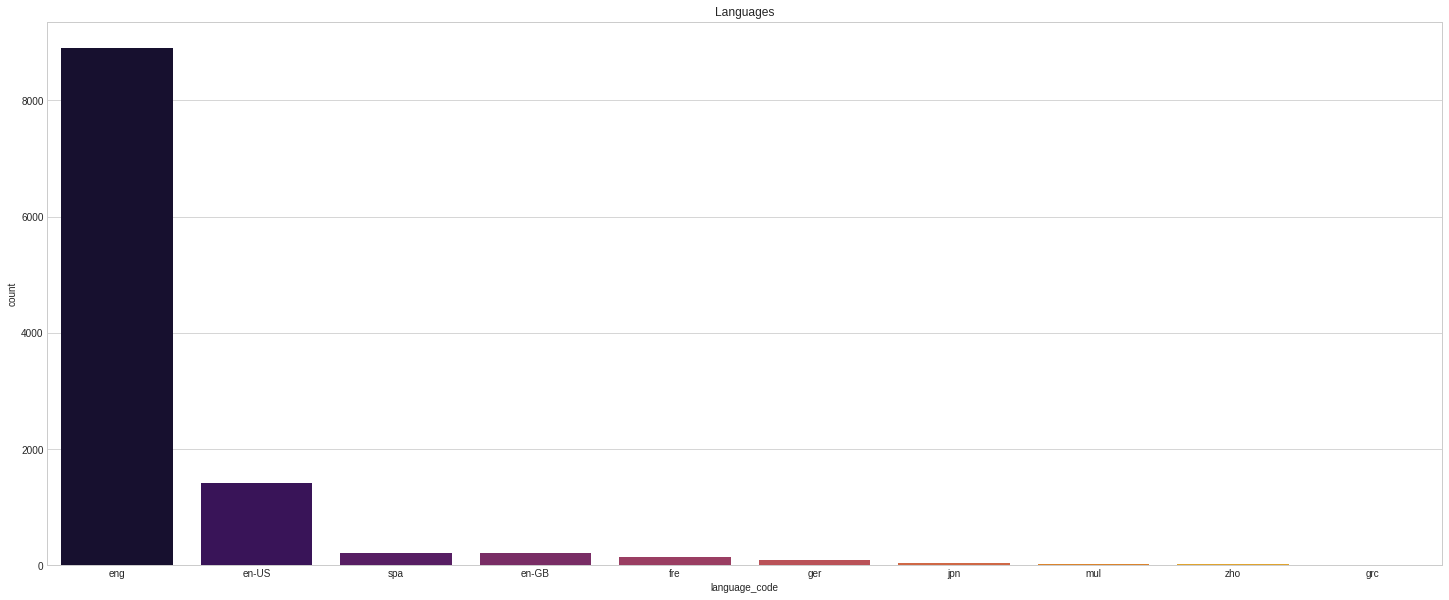

In [12]:
plt.figure(1, figsize=(25,10))
plt.title("Languages")
sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df,palette='inferno')

We can see most of the Books are written in english be it US or UK which was quite obvious but in order to check it thoroughly, we had to make this plot. We also have languages like Japanese and German but these aren't very prominent.

There are tons of great and famous authors present in our data. Our next goal is to figure out the top 10 authors present in our data based on on the average ratings on their books. We will filter out the authors based upon how many of their books have average rating above 4.4.

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20161 missing from current font.
  font.set_

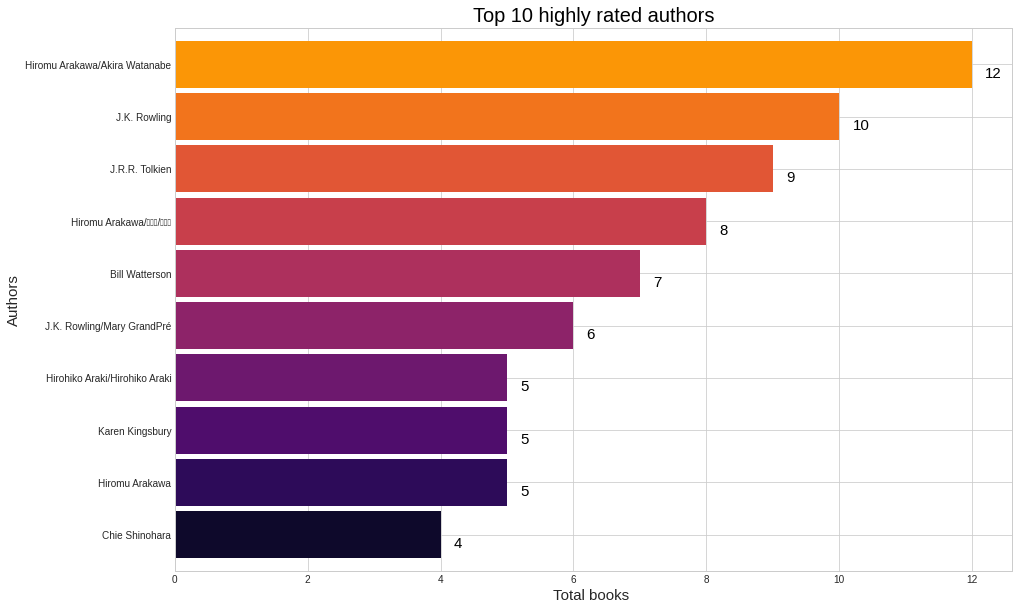

In [13]:
highly_rated_author =df[df['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(15,10))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

From the above graph we can see that Hiromu arkawa is the highest rated author in our data set follwed by J.K Rowling and some other big names. Now that we know about our authors, we will go and take a look at our top publishers as well.

In [ ]:
top_publishers = df.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)
ax.set_title("Top 10 Publishers Present in our data",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Vintage are the Most famous publishers present in our data followed by Penguin Books and Penguin Classics.

Next up, we will have a look at the distribution of average ratings, this will be very important for us when we go on to make our recommender.

Text(0.5, 0, 'Average rating')

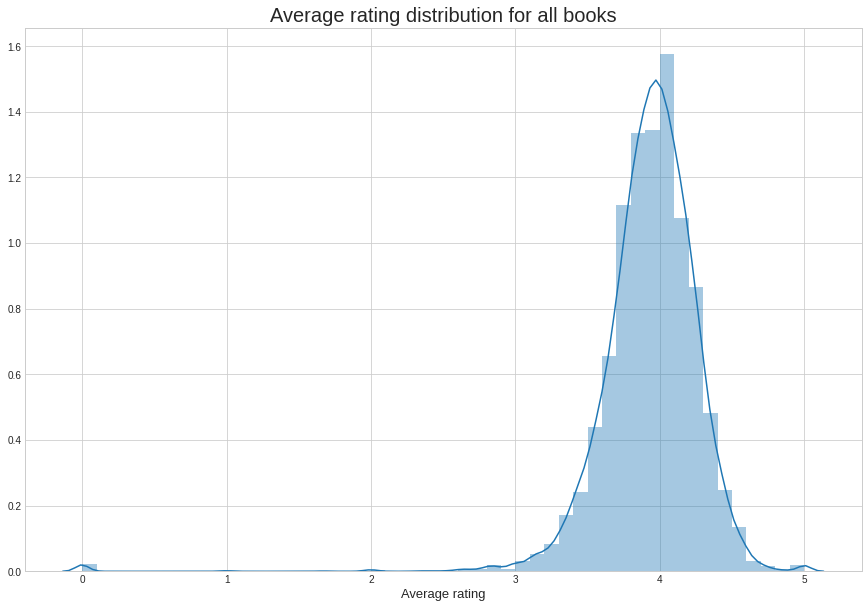

In [15]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

So as we can see, majority of our rating fall between 3 and 4.5. There are hardly any books that have been rated a 1 or a 2 and same goes with 5.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Let's try and find some relation between our average rating and the rating counts. We are doing this to see how we can use these columns in our recommender. We will also check the distribution of average ratings with Number of pages of a book, the language used in the Book and the Number of Text reviews.

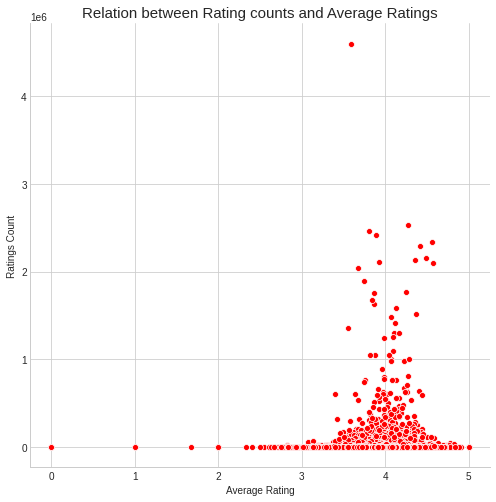

In [17]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1080x720 with 0 Axes>

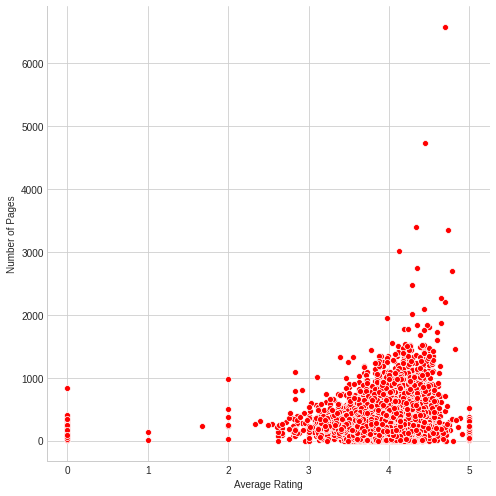

In [18]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

<Figure size 1080x720 with 0 Axes>

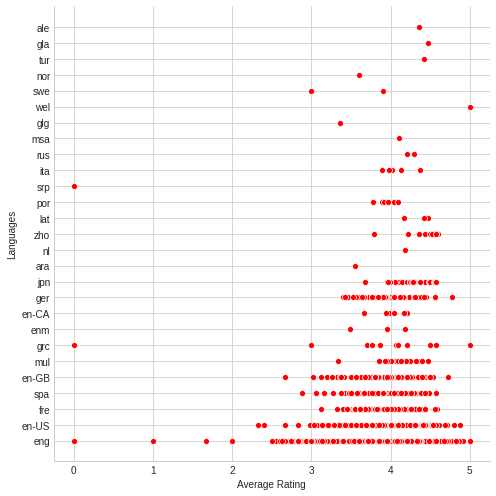

In [19]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="language_code", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Languages")

<Figure size 1080x720 with 0 Axes>

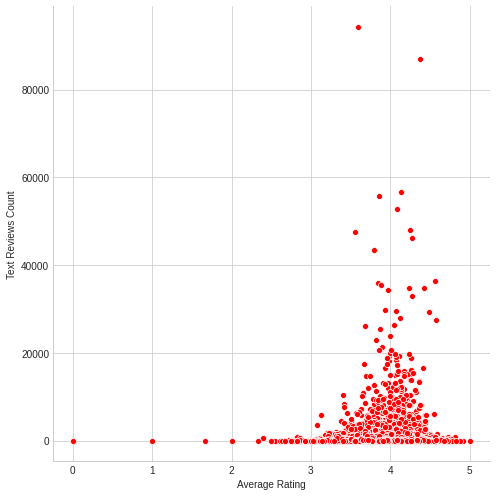

In [20]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Text Reviews Count")

After comparing the average rating with the different columns, we can go ahead with using the Language and the Rating counts for our recommender system. Rest other colummns weren't making much sense and using them might not help us in a big way so we can omit them.

We will create a copy of our original data just to be safe so that we are safe in case we mess up something.

In [21]:
df2 = df.copy()

We will now create a new column called 'rating_between'. We will divide our average rating column into various categories such as rating between 0 and 1, 1 and 2 and so on. This will work as one of the features that we will feed to our model so that it can make better predictions.

In [22]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [23]:
df2.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


We will now create two new data frames that contain the different values for the rating_between column we just made. We will assign the value 1 if a rating falls under a particular group lets say 4 and 5 and rest others will be given the value of 0. We will apply the same approach to divide the language code column to retrive  these languages individually and give them the value of 1 and 0 as well where 1 will be assigned if the book is written in a particular language for example, English and 0 if it's not written in English.

In [24]:
rating_df = pd.get_dummies(df2['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [25]:
language_df = pd.get_dummies(df2['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now concatenate these two data frames into one and name it features. This Data frame will be the features that we will feed to the mmodel. It will contain the values of rating_df and language_df and will also have the values of average rating and ratings count.

In [26]:
features = pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


Now that we have our features ready, we will now use the Min-Max scaler to scale these values down. It will help in reducing the bias for some of the books that have too many features. It will basically find the median for all and equalize it,

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

We have scaled down our features and now we will use KNN to create our Recommender system.

In [29]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

We fit all the features to our model and now we will have to create a custom method. When this method will be called, we will have to pass the name of the book in it. The model will try and find the books based on the features that we have passed in it. We will store these book names that the system recommends in a list and return it at the end.

In [30]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [31]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [32]:
BookNames = BookRecommender('The Lord of the Rings: Weapons and Warfare')
BookNames

['The Lord of the Rings: Weapons and Warfare',
 'Fullmetal Alchemist  Vol. 2 (Fullmetal Alchemist  #2)',
 "Carrie / 'Salem's Lot / The Shining",
 'The Valley of Vision: A Collection of Puritan Prayers and Devotions',
 'The Gettysburg Address',
 'The Return of the King (The Lord of the Rings  #3)']

With this we come to an end to our Recommender system. As we can see, our model is showing some pretty decent result. We passed in the name of one of the Harry potter books and our system quickly recommended us books based upon the average ratings. The books that we recieved have almost the same ratings and we have also recieved books such as the The Fellowhip of the Ring, which again is a fantasy based story line somewhat similar to the Harry Potter books. So we can say that our model is giving decent results. I would like to thank - [Shivam Ralli](https://www.kaggle.com/hoshi7) whose notebook i referenced. It is a  very well written kernel and everyone should have a look at it once.

In [34]:
import pickle

In [36]:
pickle.dump(model,open('model.pkl','wb'))